In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
import os
#from HOScodes import *

In [3]:
plt.style.use('/global/homes/j/jatorres/plots/pltstyle.mplstyle') #only to load mpl style params #Fix latex compiler

# Intrinsic Alignments Infused simulations

In [4]:
dir_results = '/pscratch/sd/j/jatorres/data/HOScodes/SkySim5000IA/'

## Select IA model

In [5]:
IA_model = 'NLA'
IA_params_dict = {'noIA':['noIA'],
                  'NLA':['AIAp1','AIAm1'],
                  'deltaNLA':['AIAp1_bta1','AIAp1_bta2'],
                  'deltaTT':['C2m1_bta1','C2p1_bta1'],
                  'TATT':['AIAp1_C2p1_bta1'],
                  'TT':['C2p1','C2m1'],
                  'HODNLA':['AIAp1'],
                  'HODTT':['A2p1']}
free_par = IA_params_dict[IA_model]
f0 = IA_model+'_'+free_par[0]

## map2alm

In [ ]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)} #plot axes dict
ell_map2_bins = np.arange(0,5001,1)
ell_rb = ell_map2_bins[50:-1].reshape(99,50).mean(axis=1) #x-axis map2

l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')

In [ ]:


SkySim5000_map2_IA = []
SkySim5000_map2_SC = []
SkySim5000_map2_noIA = []

p=0
q = 0
for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_map2_noIA.append(np.loadtxt(dir_results+'noIA/map2/kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    SkySim5000_map2_SC.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_deltaNLA_noIA_bta1_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    for j in range(i+1,6):
        q = j - 1
    #    print('saving bin (%d,%d)'%(i,j),'index:',int(10 - (5 - p)*(4-p)/2 + q))
#        print('saving bin (%d,%d)'%(i,j),'index:',)
        SkySim5000_map2_noIA.append(np.loadtxt(dir_results+'noIA/map2/kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))
        SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))
        SkySim5000_map2_SC.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_deltaNLA_noIA_bta1_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))
        #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))

In [ ]:
map2_rebinned_mean_noIA = []
map2_rebinned_mean_IA = []
map2_rebinned_mean_SC = []
map2_rebinned_std_noIA = []
map2_rebinned_std_IA = []
map2_rebinned_std_SC = []
for i in range(15):
    map2_rb = SkySim5000_map2_noIA[i][50:-1].reshape(99,50) #this is only a linear rebinning. Maybe try log-binning later
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_rebinned_mean_noIA.append(map2_rb_mean)
    map2_rebinned_std_noIA.append(map2_rb_std)
    map2_rb = SkySim5000_map2_IA[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_rebinned_mean_IA.append(map2_rb_mean)
    map2_rebinned_std_IA.append(map2_rb_std)
    map2_rb = SkySim5000_map2_SC[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_rebinned_mean_SC.append(map2_rb_mean)
    map2_rebinned_std_SC.append(map2_rb_std)

In [ ]:
p=0
q = 0
f,ax = plt.subplots(5,5,figsize=(20,12),sharex=False,sharey=False)
for i in range(1,6):
    p = i - 1
    index1 = int(10 - (5 - p)*(4-p)/2 + p)
    ax[i-1,i-1].plot(ell_rb,np.zeros_like(map2_rebinned_mean_noIA[index1]),'k-',lw=2)
    #ax[i-1,i-1].plot(ell_rb,map2_rebinned_mean_NLAp1[index1]/(map2_rebinned_mean_noIA[index1])-1,'r-',lw=2)
    ax[i-1,i-1].errorbar(ell_rb,map2_rebinned_mean_IA[index1]/(map2_rebinned_mean_noIA[index1])-1,yerr=map2_rebinned_std_IA[index1]/(map2_rebinned_mean_noIA[index1]),fmt='r-',lw=2)
    ax[i-1,i-1].errorbar(ell_rb,map2_rebinned_mean_SC[index1]/(map2_rebinned_mean_noIA[index1])-1,yerr=map2_rebinned_std_SC[index1]/(map2_rebinned_mean_noIA[index1]),fmt='b-',lw=2)
    ax[i-1,i-1].set_ylim(-1.2,1.2)
    ax[i-1,i-1].set_yticks([-1,-0.5,0,0.5,1])
    ax[i-1,i-1].set_xlim(7e1,4e3)
    ax[i-1,i-1].set_xscale('log')
    ax[i-1,i-1].set_xlabel(r'$\ell$')
    ax[i-1,i-1].set_ylabel(r'$\Delta C_{\ell}/C_{\ell}^{\rm noIA}$')
    ax[i-1,i-1].text(1e2,0.6,'%d - %d'%(i,i))
    #print('index: %d'%index1)
    for j in range(i+1,6):
        q = j - 1
        f.delaxes(ax[j-1,i-1])
        index2 = int(10 - (5 - p)*(4-p)/2 + q)
        ax[i-1,j-1].plot(ell_rb,np.zeros_like(map2_rebinned_mean_noIA[index2]),'k-',lw=2)
        #ax[i-1,j-1].plot(ell_rb,map2_rebinned_mean_NLAp1[index2]/(map2_rebinned_mean_noIA[index2])-1,'r-',lw=2)
        ax[i-1,j-1].errorbar(ell_rb,map2_rebinned_mean_IA[index2]/(map2_rebinned_mean_noIA[index2])-1,yerr=np.abs(map2_rebinned_std_IA[index2]/(map2_rebinned_mean_noIA[index2])),fmt='r-',lw=2)
        ax[i-1,j-1].errorbar(ell_rb,map2_rebinned_mean_SC[index2]/(map2_rebinned_mean_noIA[index2])-1,yerr=np.abs(map2_rebinned_std_SC[index2]/(map2_rebinned_mean_noIA[index2])),fmt='b-',lw=2)
        ax[i-1,j-1].set_ylim(-1.2,1.2)
        ax[i-1,j-1].set_yticks([-1,-0.5,0,0.5,1])
        ax[i-1,j-1].set_xlim(7e1,4e3)
        ax[i-1,j-1].set_xscale('log')
        ax[i-1,j-1].set_xlabel(r'$\ell$')
        ax[i-1,j-1].text(1e2,0.6,'%d - %d'%(i,j))
        #print('index: %d'%index2)

#ax[0,0].set_yscale('log')
ax[0,0].legend([l1,l2],['noIA',r'NLA ${\rm A}_{\rm IA} = +1$'],bbox_to_anchor=(0.5,-0.5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
#plt.savefig('/global/homes/j/jatorres/plots/map2alm_auto_cross_TATT_0ellbins_0_5001_rebinned.jpg',bbox_inches='tight')
plt.show()

## $M_{\rm ap}^3$

In [ ]:
from itertools import combinations_with_replacement

In [ ]:
theta_tr = combinations_with_replacement([4,8,16,32],3)
theta_tr_map3_bins = list(theta_tr)
theta_tr_map3_bins
theta_format = [ '{0}\' {1}\' {2}\' '.format(*tr) for tr in theta_tr_map3_bins ]

In [ ]:
SkySim5000_map3_noIA = []
SkySim5000_map3_IA = []

p=0
q = 0
for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_map3_noIA.append(np.loadtxt(dir_results+'noIA/map3/kappa_skysim5000_noIA_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))
    SkySim5000_map3_IA.append(np.loadtxt(dir_results+IA_model+'/map3/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))
    #SkySim5000_map3_IA.append(np.loadtxt(dir_results+IA_model+'/map3/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))


In [ ]:
f,ax = plt.subplots(2,3,figsize=(16,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>/\left<{ M_{\rm ap}^{3,\rm noIA} }\right>$')
ax[ax_d['3']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>/\left<{ M_{\rm ap}^3 ,\rm noIA}\right>$')
for i in range(5):
    l0, = ax[ax_d['%d'%i]].plot(np.arange(20),SkySim5000_map3_IA[i]/SkySim5000_map3_noIA[i] - 1,c='dodgerblue',ms=10,marker='.',ls=' ')
    l0, = ax[ax_d['%d'%i]].plot(np.arange(20),np.zeros_like(SkySim5000_map3_IA[i]),ls='--',lw=1.5)
    ax[ax_d['%d'%i]].set_xticks(np.arange(20))
    ax[ax_d['%d'%i]].set_xticklabels(theta_format, minor=False, rotation=90)
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
f.delaxes(ax[1,2])    
#a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
#ax[0,0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0,0].set_ylim(-1,1)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()
#plt.savefig('imgs/DESC_meeting/map3_Nshells_19_50_106.pdf',bbox_inches='tight')

## PDF

In [6]:
#stddev_kappa_map = 0.0165#standard deviation of fiducial kappa maps at the first tomographic bin. if kappa is not sigma_0 normalized, this is an OK value.        
bins=np.linspace(-0.005,0.005,21) 
binmids_kappacounts=(bins[1:]+bins[:-1])/2

In [7]:
binmids_kappacounts

array([-0.00475, -0.00425, -0.00375, -0.00325, -0.00275, -0.00225,
       -0.00175, -0.00125, -0.00075, -0.00025,  0.00025,  0.00075,
        0.00125,  0.00175,  0.00225,  0.00275,  0.00325,  0.00375,
        0.00425,  0.00475])

In [8]:
sl = [1,2,3,4]# smoothing 1,2,5,10.25,20 arcmin respectively.
s_i = 1
s_l = sl[s_i]

In [11]:
SkySim5000_PDF_clus_IA = []
SkySim5000_PDF_clus = []
SkySim5000_PDF_IA = []
SkySim5000_PDF_noIA = []

for i in range(1,6):
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_PDF_noIA.append(np.loadtxt(dir_results+'noIA/PDF/smoothed_theta2_kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_Counts_kmin-0.005_kmax0.005_20kappabins.dat'%(i,i)))
    SkySim5000_PDF_IA.append(np.loadtxt(dir_results+'NLA/PDF/smoothed_theta2_kappa_skysim5000_NLA_AIAp1_noisefree_tomo%d_Nmap%d_Counts_kmin-0.005_kmax0.005_20kappabins.dat'%(i,i)))
    SkySim5000_PDF_clus_IA.append(np.loadtxt(dir_results+'deltaNLA/PDF/smoothed_theta2_kappa_skysim5000_deltaNLA_AIAp1_bta1_noisefree_tomo%d_Nmap%d_Counts_kmin-0.005_kmax0.005_20kappabins.dat'%(i,i)))
    SkySim5000_PDF_clus.append(np.loadtxt(dir_results+'deltaNLA/PDF/smoothed_theta2_kappa_skysim5000_deltaNLA_noIA_bta1_noisefree_tomo%d_Nmap%d_Counts_kmin-0.005_kmax0.005_20kappabins.dat'%(i,i)))
    


/tmp/ipykernel_829094/3774374126.py:10: RuntimeWarning: divide by zero encountered in divide
  l0, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_IA[i]/SkySim5000_PDF_noIA[i] -1,'bs-')
/tmp/ipykernel_829094/3774374126.py:10: RuntimeWarning: invalid value encountered in divide
  l0, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_IA[i]/SkySim5000_PDF_noIA[i] -1,'bs-')
/tmp/ipykernel_829094/3774374126.py:11: RuntimeWarning: invalid value encountered in divide
  l1, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_noIA[i]/SkySim5000_PDF_noIA[i] -1,'k-')
/tmp/ipykernel_829094/3774374126.py:12: RuntimeWarning: divide by zero encountered in divide
  l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_clus_IA[i]/SkySim5000_PDF_noIA[i] -1,'r^-')
/tmp/ipykernel_829094/3774374126.py:13: RuntimeWarning: invalid value encountered in divide
  l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_clus[i]/SkySim5000_PDF_noIA[i] -1,'go-')
/tmp/ipyke

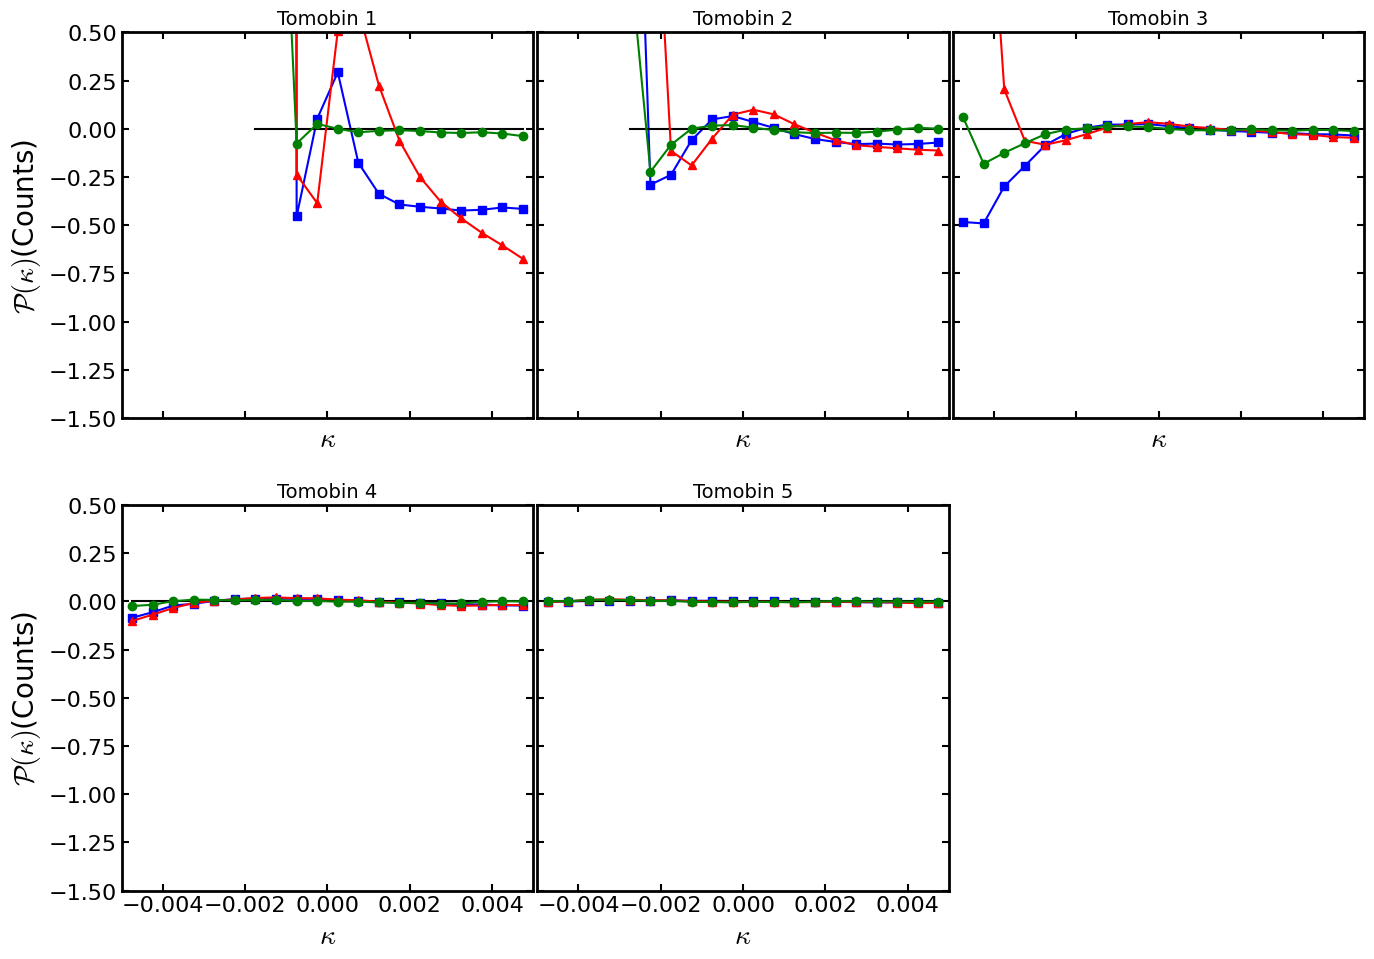

In [13]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

f,ax = plt.subplots(2,3,figsize=(14,10),sharex=True,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')
ax[ax_d['3']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')

for i in range(5):

    l0, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_IA[i]/SkySim5000_PDF_noIA[i] -1,'bs-')
    l1, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_noIA[i]/SkySim5000_PDF_noIA[i] -1,'k-')
    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_clus_IA[i]/SkySim5000_PDF_noIA[i] -1,'r^-')
    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_clus[i]/SkySim5000_PDF_noIA[i] -1,'go-')

    #ax[ax_d['%d'%i]].set_xticks([-0.01,-0.005,0.0,0.005])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[0,0].set_xlim(-0.005,0.005)
    #ax[ax_d['%d'%i]].set_ylim(0,120)
    ax[ax_d['%d'%i]].set_xlabel(r'$\kappa$')
#a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
f.delaxes(ax[1,2])
#c1 = ax[ax_d['2']].legend([l0,l1],['hacc-noia','hacc-ia'],loc=1)
#ax[ax_d['2']].add_artist(c1)
#ax[0,0].set_yscale('log')
ax[0,0].set_ylim(-1.5,0.5)
#ax[0,0].set_xlim(-0.005,0.005)

plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/global/homes/j/jatorres/plots/pdf_comparison_hacc-ia_skysim_e1flip.jpg',bbox_inches='tight')
plt.show()

In [ ]:

SkySim5000_peaks_IA = []
SkySim5000_minima_IA = []
SkySim5000_peaks_noIA = []
SkySim5000_minima_noIA = []

for i in range(1,6):
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    #SkySim5000_PDF_noIA.append(np.loadtxt(dir_results+'flipped/noIA/peaks/kappa_skysim5000_noIA_noisefree_tomo%d_e1flip_Nmap%d_peaks_posRADEC_amp.dat'%(i,i),usecols=(2,)))
    SkySim5000_peaks_noIA.append(np.loadtxt(dir_results+'noIA/peaks/smoothed_theta%d_kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_peaks_posRADEC_amp.dat'%(s_i,i,i)))
    SkySim5000_minima_noIA.append(np.loadtxt(dir_results+'noIA/peaks/smoothed_theta%d_kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_minima_posRADEC_amp.dat'%(s_i,i,i)))
    #SkySim5000_PDF_noIA_f.append(np.loadtxt(dir_results+'flipped/noIA/peaks/kappa_skysim5000_noIA_noisefree_tomo%d_e2flip_Nmap%d_peaks_posRADEC_amp.dat'%(i,i),usecols=(2,)))
    #SkySim5000_PDF_IA.append(np.loadtxt(dir_results+IA_model+'/PDF/smoothed_theta%d_kappa_skysim5000_'%s_i+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_Counts_kappa_width0.1_200Kappabins.dat'%(i,i)))
    SkySim5000_peaks_IA.append(np.loadtxt(dir_results+IA_model+'/peaks/smoothed_theta%d_kappa_skysim5000_NLA_AIAp1_noisefree_tomo%d_Nmap%d_peaks_posRADEC_amp.dat'%(s_i,i,i)))
    SkySim5000_minima_IA.append(np.loadtxt(dir_results+IA_model+'/peaks/smoothed_theta%d_kappa_skysim5000_NLA_AIAp1_noisefree_tomo%d_Nmap%d_minima_posRADEC_amp.dat'%(s_i,i,i)))
    


In [ ]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

f,ax = plt.subplots(2,3,figsize=(14,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')
ax[ax_d['3']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')

for i in range(5):
    bins=np.linspace(-0.05,0.05,201) #typical ranges and number of bins
    binmids_peaks_minima=(bins[1:]+bins[:-1])/2
    counts_peaks,bins=np.histogram(SkySim5000_peaks_IA[i],density=False,bins=bins)
    counts_minima,bins=np.histogram(SkySim5000_minima_IA[i],density=False,bins=bins)

    counts_peaks_noIA,bins=np.histogram(SkySim5000_peaks_noIA[i],density=False,bins=bins)
    counts_minima_noIA,bins=np.histogram(SkySim5000_minima_noIA[i],density=False,bins=bins)

    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_peaks,color='red',marker='o',ls='--')
    l3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_minima,color='red',marker='o',ls=':')
    m2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_peaks_noIA,color='black',marker='o',ls='--')
    m3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_minima_noIA,color='black',marker='o',ls=':')
    #
    ax[ax_d['%d'%i]].set_xticks([-0.01,-0.005,0.0,0.005])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[ax_d['%d'%i]].set_xlim(-0.01,0.01)
    ax[ax_d['%d'%i]].set_xlabel(r'$\kappa$')
#a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
f.delaxes(ax[1,2]) 
#ax[0,0].set_yscale('log')
#ax[0,0].set_ylim(-1,1)
ax[0,0].set_xlim(-0.01,0.01)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
#plt.savefig('/global/homes/j/jatorres/plots/PDF_TATT.png',bbox_inches='tight')
plt.show()

## Integrated 3PCF

In [ ]:
f0

In [ ]:
SkySim5000_i3PCF_zp_noIA = []
SkySim5000_i3PCF_zm_noIA = []
SkySim5000_i3PCF_zp_noIA = []
SkySim5000_i3PCF_zm_noIA = []

p=0
q = 0

for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_i3PCF_zm_noIA.append(np.loadtxt(dir_results+IA_model+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,i,3)+f0+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_noIA.append(np.loadtxt(dir_results+IA_model+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,i,3)+f0+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_IA.append(np.loadtxt(dir_results+IA_model+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,i,3)+f0+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zm_IA.append(np.loadtxt(dir_results+IA_model+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,i,3)+f0+'_shear+IA_theta_zeta_zetaerr.dat'))
    


In [ ]:
line_shear = Line2D([0,0],[0,0],lw=2,ls='-',color='k')
line_shear_IA = Line2D([0,0],[0,0],lw=2,ls='--',color='k')

In [ ]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)} #plot axes dict

l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')
l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')

line_shear = Line2D([0,0],[0,0],lw=2,ls='-',color='k')
line_shear_IA = Line2D([0,0],[0,0],lw=2,ls='--',color='k')

In [ ]:
f,ax = plt.subplots(2,3,figsize=(14,8),sharex=False,sharey=False)

ax[ax_d['0']].set_ylabel(r'$\zeta_{\pm}$')
ax[ax_d['3']].set_ylabel(r'$\zeta_{\pm}$')

pre_factor = 1e8
theta_arcmins = SkySim5000_i3PCF_zm_noIA[0][:,0]

for i in range(5):
    l0 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_noIA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_noIA[i][:,2],c='b',fmt='-',capsize=2)
    l1 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_baryon[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_baryon[i][:,2],c='b',fmt='--',capsize=2)
    l2 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_noIA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_noIA[i][:,2],c='r',fmt='-',capsize=2)
    l3 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_baryon[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_baryon[i][:,2],c='r',fmt='--',capsize=2)

#    l2, = ax[ax_d['%d'%i]].errobar()
#    l3, = ax[ax_d['%d'%i]].errobar()    
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[ax_d['%d'%i]].set_xlabel('$\\theta$ [arcmins]', fontsize=15)
    ax[ax_d['%d'%i]].set_xscale('log')
f.delaxes(ax[1,2])    
a1 = ax[1,1].legend([l0,l2],[r'$\zeta_{+}$',r'$\zeta_{-}$'],loc=1,bbox_to_anchor=(1.7,1.0))
a2 = ax[1,1].legend([line_shear,line_shear_IA],[r'dmo',r'dmb'],loc=1,bbox_to_anchor=(1.7,0.70))
ax[1,1].add_artist(a1)
ax[1,1].add_artist(a2)
#ax[0,0].set_yscale('log')
#ax[0,0].set_ylim(-30,30)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()
#plt.savefig('imgs/DESC_meeting/map3_Nshells_19_50_106.pdf',bbox_inches='tight')

## Some cross bins

In [ ]:
IA_params_dict = {'noIA':['noIA'],
                  'NLA':['AIAp1','AIAm1'],
                  'deltaNLA':['AIAp1_bta1','AIAp1_bta2','noIA_bta1'],
                  'deltaTT':['C2m1_bta1','C2p1_bta1'],
                  'TATT':['AIAp1_C2p1_bta1'],
                  'TT':['C2p1','C2m1'],
                  'HODNLA':['AIAp1'],
                  'HODTT':['A2p1']}


In [ ]:
IA_model1 = 'NLA'
free_par = IA_params_dict[IA_model1]
f1 = IA_model1+'_'+free_par[0]
#
IA_model2 = 'TT'
free_par = IA_params_dict[IA_model2]
f2 = IA_model2+'_'+free_par[0]
#
IA_model3 = 'deltaNLA'
free_par = IA_params_dict[IA_model3]
f3 = IA_model3+'_'+free_par[0]

In [ ]:
p=0
q = 0


trios = np.array([[1,1,1],
                  [1,1,3],
                  [1,3,3],
                  [3,1,1],
                  [3,1,3],
                  [3,3,3]])


In [ ]:
SkySim5000_i3PCF_zp_IA_TT = []
SkySim5000_i3PCF_zm_IA_TT = []
SkySim5000_i3PCF_zp_IA_NLA = []
SkySim5000_i3PCF_zm_IA_NLA = []
SkySim5000_i3PCF_zp_IA_deltaNLA = []
SkySim5000_i3PCF_zm_IA_deltaNLA= []

SkySim5000_i3PCF_zp_noIA_TT = []
SkySim5000_i3PCF_zm_noIA_TT = []
SkySim5000_i3PCF_zp_noIA_NLA = []
SkySim5000_i3PCF_zm_noIA_NLA = []
SkySim5000_i3PCF_zp_noIA_deltaNLA = []
SkySim5000_i3PCF_zm_noIA_deltaNLA= []


for t in trios:
    i,j,k = t 
    
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_i3PCF_zm_IA_TT.append(np.loadtxt(dir_results+IA_model2+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f2+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_IA_TT.append(np.loadtxt(dir_results+IA_model2+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f2+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zm_IA_NLA.append(np.loadtxt(dir_results+IA_model1+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f1+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_IA_NLA.append(np.loadtxt(dir_results+IA_model1+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f1+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zm_IA_deltaNLA.append(np.loadtxt(dir_results+IA_model3+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f3+'_shear+IA_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_IA_deltaNLA.append(np.loadtxt(dir_results+IA_model3+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f3+'_shear+IA_theta_zeta_zetaerr.dat'))    

    SkySim5000_i3PCF_zm_noIA_TT.append(np.loadtxt(dir_results+IA_model2+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f2+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_noIA_TT.append(np.loadtxt(dir_results+IA_model2+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f2+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zm_noIA_NLA.append(np.loadtxt(dir_results+IA_model1+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f1+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_noIA_NLA.append(np.loadtxt(dir_results+IA_model1+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f1+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zm_noIA_deltaNLA.append(np.loadtxt(dir_results+IA_model3+'/i3PCF/zeta_m_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f3+'_shear_theta_zeta_zetaerr.dat'))
    SkySim5000_i3PCF_zp_noIA_deltaNLA.append(np.loadtxt(dir_results+IA_model3+'/i3PCF/zeta_p_SkySim5000_tomo{0}_tomo{1}_tomo{2}_'.format(i,j,k)+f3+'_shear_theta_zeta_zetaerr.dat'))    

In [ ]:
ax_d = {'0':(0,0),'1':(1,0),'2':(2,0),'3':(0,1),'4':(1,1),'5':(2,1)} #plot axes dict

l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')

line_shear = Line2D([0,0],[0,0],lw=2,ls='-',color='k')
line_shear_IA = Line2D([0,0],[0,0],lw=2,ls='--',color='k')

In [ ]:
f,ax = plt.subplots(3,2,figsize=(12,8),sharex=True,sharey=False)

#ax[ax_d['0']].set_ylabel(r'$\zeta_{\pm}$')
#ax[ax_d['3']].set_ylabel(r'$\zeta_{\pm}$')

pre_factor = 1e8
theta_arcmins = SkySim5000_i3PCF_zm_noIA_NLA[0][:,0]

for i in range(6):
    l0 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_NLA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_NLA[i][:,2],c='r',fmt='-',capsize=2)
    l1 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_TT[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_TT[i][:,2],c='g',fmt='-',capsize=2)
    l2 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_deltaNLA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_IA_deltaNLA[i][:,2],c='b',fmt='-',capsize=2)
    l3 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_noIA_NLA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_NLA[i][:,2],c='r',fmt='--',capsize=2)
    l4 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_noIA_TT[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_IA_TT[i][:,2],c='g',fmt='--',capsize=2)
    l5 = ax[ax_d['%d'%i]].errorbar(theta_arcmins,theta_arcmins*pre_factor*SkySim5000_i3PCF_zm_noIA_deltaNLA[i][:,1],yerr=theta_arcmins*pre_factor*SkySim5000_i3PCF_zp_IA_deltaNLA[i][:,2],c='b',fmt='--',capsize=2)
    


    ax[ax_d['%d'%i]].set_title('Tomobin %d-%d-%d'%(tuple(trios[i])),fontsize=14)
    ax[ax_d['%d'%i]].set_xscale('log')
ax[ax_d['2']].set_xlabel('$\\theta$ [arcmins]', fontsize=15)


a1 = ax[1,1].legend([l0,l2],[r'$\zeta_{+}$',r'$\zeta_{-}$'],loc=1,bbox_to_anchor=(1.5,1.0))
a2 = ax[1,1].legend([line_shear,line_shear_IA],[r'Shear',r'Shear+IA'],loc=1,bbox_to_anchor=(1.5,0.60))
ax[1,1].add_artist(a1)
ax[1,1].add_artist(a2)
#ax[0,0].set_yscale('log')
#ax[0,0].set_ylim(-30,30)

plt.tight_layout()
plt.subplots_adjust(wspace=0.12)
#plt.savefig('/global/homes/j/jatorres/HOS-Y1-prep/hoscodes/notebooks/imgs/i3pcf_TT_shear_shear+IA_noiseless.jpg',bbox_inches='tight')